# 1. Import required libraries and read the dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Apps_data.csv")

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
# print head of data

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# print tail of data

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# print shape of data

df.shape

# we can see  that there are 10841 rows and 13 columns

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [7]:
df.describe(include="all") # here we can check summary for categorical and numerical variable

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [8]:
# checking for duplicates record in the data

duplicates = df.duplicated().sum()
print("no of duplicates :",duplicates)

no of duplicates : 483


In [9]:
# dropping the duplicates using 'drop' funtion

df=df.drop_duplicates()
print("Number of records after dropping duplicates :", len(df))

Number of records after dropping duplicates : 10358


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [10]:
unique_categories = df['Category'].unique()
print("Unique categories:", unique_categories)

Unique categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [11]:
invalid_categories = ['Invalid_Category1', 'Invalid_Category2']
# Filter out rows with invalid categories
df = df[~df['Category'].isin(invalid_categories)]

In [12]:
unique_categories = df['Category'].unique()
print(unique_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [13]:
# checking for missing values

miss_values = df["Rating"].isnull().sum()
print("no of missing values :",miss_values)

no of missing values : 1465


In [14]:
# dropping the null value 
df.dropna(subset=["Rating"],inplace=True)

In [15]:
# creating the new category "Rating_category" from column "Rating"

df["Rating_category"] = df["Rating"].apply(lambda x: "high" if x>3.5 else "low")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [16]:
rating_category_counts = df['Rating_category'].value_counts()

# Print the distribution
print("Distribution of 'Rating_category':",rating_category_counts)

# Calculate the percentage distribution
rating_category_percentage = df['Rating_category'].value_counts(normalize=True) * 100

# Print the percentage distribution
print("\nPercentage distribution of 'Rating_category':")
print(rating_category_percentage)

Distribution of 'Rating_category': Rating_category
high    8013
low      880
Name: count, dtype: int64

Percentage distribution of 'Rating_category':
Rating_category
high    90.104577
low      9.895423
Name: proportion, dtype: float64


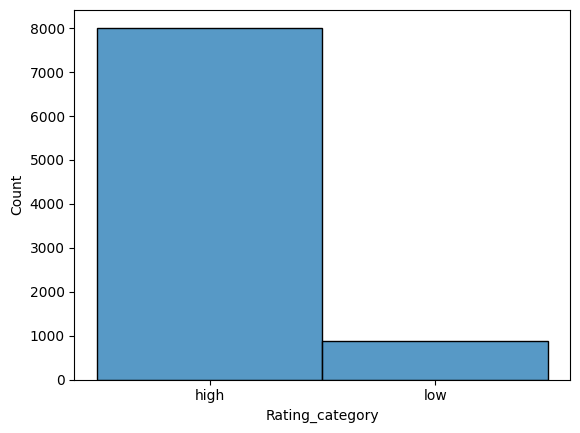

In [17]:
# df1_data1['Rating_category']

sns.histplot(x ='Rating_category', data = df)

plt.show()

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [18]:
# converting the "Reviews"columns to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df["Reviews"].dtypes

dtype('float64')

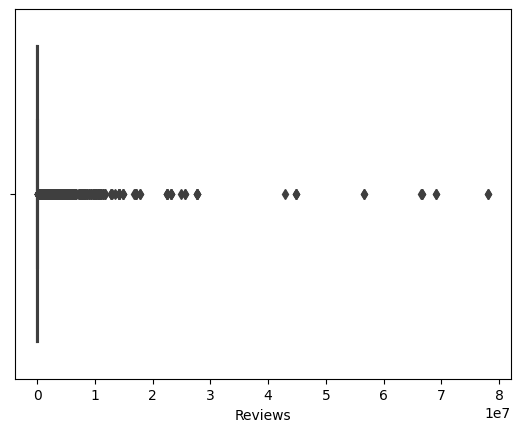

In [19]:
# plotting the box plot to check for outlier

sns.boxplot(x=df["Reviews"])
plt.show()

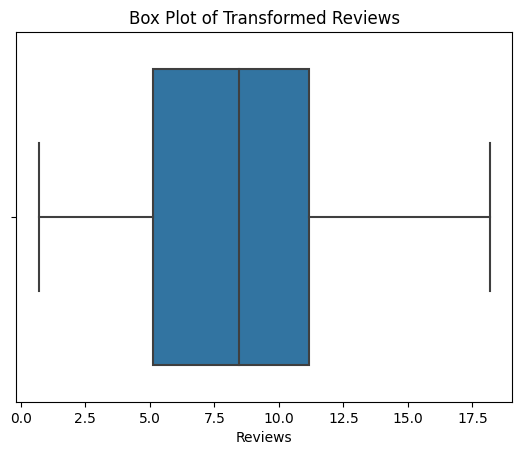

In [20]:
# Apply log transformation to 'Reviews' column
df['Reviews'] = np.log1p(df['Reviews'])

# Create a box plot of the transformed 'Reviews' column
sns.boxplot(x=df['Reviews'])

# Set the plot title
plt.title("Box Plot of Transformed Reviews")

# Show the plot
plt.show()

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')



In [21]:
# Replacing  M with 1 million and K with 1 thousand
df['Size'] = df['Size'].replace({'M':'1000000', 'K':'1000', 'k':'1000'}, regex  = True)
# data_file

df = df[df['Size'] != 'Varies with device']
df
df['Size'] = df['Size'].replace({'1,000+':'1000'})
df['Size'] = pd.to_numeric(df['Size'])
df['Size'].dtype

dtype('float64')

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,1.910000e+08,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,1.410000e+08,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.710000e+00,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,2.510000e+08,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.810000e+00,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [23]:
# Check the column 'Installs', treat the unwanted characters ie replacing the unwanted characters 
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,1.910000e+08,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,1.410000e+08,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8.710000e+00,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,2.510000e+08,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2.810000e+00,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,6.191000e+06,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high
10834,FR Calculator,FAMILY,4.0,2.079442,2.610000e+00,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,5.310000e+08,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3.610000e+00,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high


In [24]:
# converting the column to numeric data type

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [25]:
# checking the column "Price" for unwanted characters
df["Price"] = df["Price"].str.replace("[$,]","",regex=True)
df["Price"].dtypes

dtype('O')

In [26]:
# converting the columns to nueric data type
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df["Price"].dtypes

dtype('float64')

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)




In [27]:
# taking all the redundant that are not uasble for analysis

redundant_col = ["Rating","App","Genres","Last Updated","Current Ver","Android Ver"]

# droping the redundant column

df.drop(redundant_col,axis=1,inplace=True)

In [28]:
df.head() # printing head of the data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,1.910000e+08,10000.0,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,1.410000e+08,500000.0,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8.710000e+00,5000000.0,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,2.510000e+08,50000000.0,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2.810000e+00,100000.0,Free,0.0,Everyone,high


# 13. Encode the categorical columns.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [30]:


encoder = LabelEncoder()

# encoding the categorical columns using labelencoder

df["Category"] = encoder.fit_transform(df["Category"])
df["Type"] = encoder.fit_transform(df["Type"])
df["Content Rating"] = encoder.fit_transform(df["Content Rating"])
df["Rating_category"] = encoder.fit_transform(df["Rating_category"])

In [31]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,1,5.075174,1.910000e+08,10000.0,1,0.0,1,0
1,1,6.875232,1.410000e+08,500000.0,1,0.0,1,0
2,1,11.379520,8.710000e+00,5000000.0,1,0.0,1,0
3,1,12.281389,2.510000e+08,50000000.0,1,0.0,4,0
4,1,6.875232,2.810000e+00,100000.0,1,0.0,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7425 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7425 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7425 non-null   float64
 3   Installs         7424 non-null   float64
 4   Type             7425 non-null   int32  
 5   Price            7424 non-null   float64
 6   Content Rating   7425 non-null   int32  
 7   Rating_category  7425 non-null   int32  
dtypes: float64(4), int32(4)
memory usage: 406.1 KB


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [33]:
array = df.values

x = array[:,0:6]  # select all rows and first 7 columns which are the attributes
y = array[:,7]  # select the 8th column which is the classification "high", "low".

# 15. Split the dataset into train and test.

In [34]:
# splited the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 , random_state = 9)



# 16. Standardize the data, so that the values are within a particular range.

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
x_train_scaled = scaler.fit_transform(x_train)

# Fit and transform the data
x_test_scaled = scaler.transform(x_test)

x_train_scaled

x_test_scaled 

array([[4.54545455e-01, 6.60059664e-01, 2.40759240e-01, 4.99999900e-03,
        5.00000000e-01, 0.00000000e+00],
       [1.51515152e-01, 1.88972435e-01, 5.40459540e-01, 4.99900000e-06,
        5.00000000e-01, 0.00000000e+00],
       [4.54545455e-01, 3.03588172e-01, 7.20279720e-01, 4.99990000e-05,
        5.00000000e-01, 0.00000000e+00],
       ...,
       [7.57575758e-01, 4.67712184e-01, 1.30869130e-01, 9.99999001e-04,
        5.00000000e-01, 0.00000000e+00],
       [4.54545455e-01, 5.57539048e-01, 8.20179820e-01, 9.99999001e-04,
        5.00000000e-01, 0.00000000e+00],
       [3.63636364e-01, 6.10591996e-01, 2.39760240e-09, 9.99999001e-04,
        5.00000000e-01, 0.00000000e+00]])